In [1]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=3a8a6f24162020f9d59d8cce4bb3ab623291dc38871e55f5b8784404d3a4a6fa
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [2]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji

nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_json("/content/drive/MyDrive/testdata/Sarcasm_Headlines_Dataset_v3.json", lines=True)

# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

def extract_emojis(text):
    return [c for c in text if c in emoji.EMOJI_DATA['🥇']['en']]

def preprocess_data(df):
    df['clean_text'] = df['headline'].apply(clean_text)
    df['emojis'] = df['headline'].apply(extract_emojis)
    return df

data = preprocess_data(data)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(train_data['clean_text'])
X_test_vec = vectorizer.transform(test_data['clean_text'])

# Create emoji count features
def extract_emoji_count(emojis):
    return len(emojis)

train_emoji_count = train_data['emojis'].apply(extract_emoji_count)
test_emoji_count = test_data['emojis'].apply(extract_emoji_count)

# Combine text and emoji count features
X_train_combined = np.hstack((X_train_vec.toarray(), np.array(train_emoji_count).reshape(-1, 1)))
X_test_combined = np.hstack((X_test_vec.toarray(), np.array(test_emoji_count).reshape(-1, 1)))



y_train = train_data['is_sarcastic']
y_test = test_data['is_sarcastic']

# Train the Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_combined, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix)
print('Classification Report:')
print(classification_report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.801
Confusion Matrix:
[[923 187]
 [211 679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1110
           1       0.78      0.76      0.77       890

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



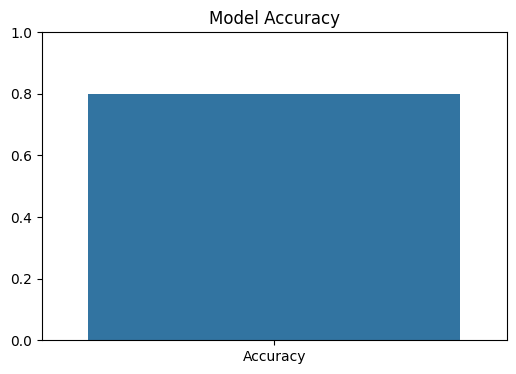

ValueError: ignored

<Figure size 800x600 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualize Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.ylim([0, 1])
plt.title('Model Accuracy')
plt.show()

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Generate the plots
plot_confusion_matrix(confusion_matrix)

print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix)